In [1]:
import json
benchmark_raw_data = json.load(open('./report_prob1.json'))['results']

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(color_codes=True)

In [3]:
import re

command_prob1_regex = re.compile(r'\.\/main < tests\/seq_prob1_(\d+)\.txt')

def parse_command_prob1(command):
  return int(command_prob1_regex.match(command).group(1))

In [4]:
flat_map = lambda f, xs: [y for ys in xs for y in f(ys)]

benchmark_data = flat_map(lambda run: ([parse_command_prob1(run['command']), time] for time in run['times']), benchmark_raw_data)

In [5]:
df_p1 = pd.DataFrame(data=benchmark_data,columns=['size', 'time'])

In [6]:
df_p1

,size,time
0,80000,0.051846
1,80000,0.023952
2,80000,0.021913
3,80000,0.058523
4,80000,0.034486
...,...,...
13239,30,0.004691
13240,30,0.004708
13241,30,0.004433
13242,30,0.005051


[None, None]

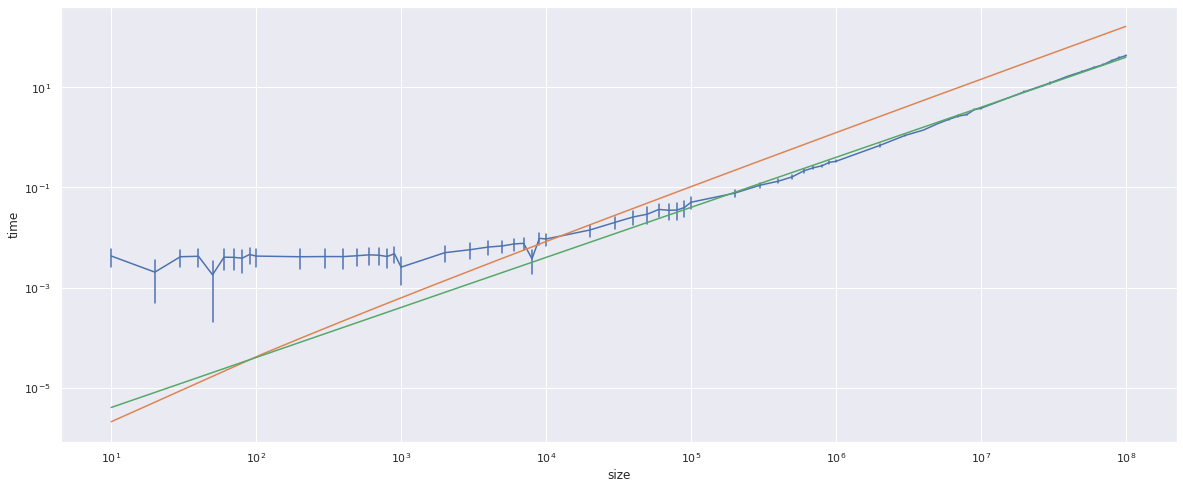

In [7]:
x = np.linspace(10, 100000000, 1000000)
y = (x * np.log2(x)) / 16000000
y2 = x / 2500000

plt.figure(figsize=(20, 8))
ax = sns.lineplot(x="size", y="time", data=df_p1, err_style="bars", ci="sd")
ax.plot(x,y)
ax.plot(x,y2)
ax.set(xscale="log", yscale="log")